In [1]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.compose import make_column_transformer, make_column_selector

## XGBoost All Features

In [4]:
data=pd.read_csv('df_student_features_entiredata.csv')
data.drop(columns=['Unnamed: 0','subscriptiontype','onboard_flag','daysafterpur'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_country    36136 non-null  object 
 1   totaldays_engaged  36136 non-null  int64  
 2   courseswatched     36136 non-null  int64  
 3   questionsasked     36136 non-null  int64  
 4   totalminwatched    36136 non-null  float64
 5   tendaysafter       36136 non-null  float64
 6   fifteendaysafter   36136 non-null  float64
 7   thirtydaysafter    36136 non-null  float64
 8   sixtydaysafter     36136 non-null  float64
 9   conversion         36136 non-null  int64  
 10  2                  36136 non-null  float64
 11  3                  36136 non-null  float64
 12  4                  36136 non-null  float64
 13  5                  36136 non-null  float64
 14  7                  36136 non-null  float64
 15  11                 36136 non-null  float64
 16  12                 361

In [5]:
data.to_csv('365_Final_Features_deployed.csv')

In [25]:
import xgboost as xgb
y=data['conversion']
X=data.drop(columns=['conversion'])
ct=ColumnTransformer([('ohecc',OneHotEncoder(sparse=False),['student_country'])],remainder='passthrough')
X=ct.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
xgfin=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgfin.fit(X_train,y_train)
y_pred=xgfin.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

Confusion Matrix: 
 [[6589  138]
 [  57  444]]
F1 Score: 
 0.8199445983379502
Balanced Accuracy Score: 
 0.932856599867012
All Scores: 
 (array([0.99142341, 0.7628866 ]), array([0.97948565, 0.88622754]), array([0.98541838, 0.8199446 ]), array([6727,  501], dtype=int64))


In [11]:
data['conversion'].value_counts()

0    33095
1     3041
Name: conversion, dtype: int64

## Random Undersampler / Oversampler

### Random Undersampler

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [13]:
rus = RandomUnderSampler(random_state=123, replacement=True) 
X_train1,y_train1 = rus.fit_resample(X_train,y_train)
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train1))

original dataset shape: Counter({0: 26476, 1: 2432})
Resample dataset shape Counter({0: 2432, 1: 2432})


In [26]:
xgrus=xgb.XGBClassifier(use_label_encoder=False,,eval_metric='logloss')
xgrus.fit(X_train1,y_train1)
y_pred=xgrus.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
F1=f1_score(y_pred,y_test)
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))


[05:08:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
 [[6291   38]
 [ 355  544]]
F1 Score: 
 0.7346387575962188
Balanced Accuracy Score: 
 0.799556344183272
All Scores: 
 (array([0.94658441, 0.9347079 ]), array([0.99399589, 0.6051168 ]), array([0.96971098, 0.73463876]), array([6329,  899], dtype=int64))


### Oversampler

In [17]:
rus = RandomOverSampler(random_state=123) 
X_train2,y_train2 = rus.fit_resample(X_train,y_train)
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train2))

original dataset shape: Counter({0: 26476, 1: 2432})
Resample dataset shape Counter({0: 26476, 1: 26476})


In [27]:
xgros=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgros.fit(X_train2,y_train2)
y_pred=xgros.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
F1=f1_score(y_pred,y_test)
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

[05:09:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
 [[6502   43]
 [ 144  539]]
F1 Score: 
 0.8521739130434782
Balanced Accuracy Score: 
 0.8912977729358748
All Scores: 
 (array([0.97833283, 0.92611684]), array([0.9934301 , 0.78916545]), array([0.98582367, 0.85217391]), array([6545,  683], dtype=int64))


## XGBoost - short form (4 features for Tableau deployment / dashboards)

In [20]:
df=pd.read_csv('pd_data3.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns=['onboard_flag'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   student_country    36136 non-null  object
 1   totaldays_engaged  36136 non-null  int64 
 2   tendaysafter       36136 non-null  int64 
 3   conversion         36136 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [28]:
import xgboost as xgb
xgccfin1=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
y=df['conversion']
X=df.drop(columns=['conversion'])
ct1=ColumnTransformer([('ohecc',OneHotEncoder(sparse=False),['student_country'])],remainder='passthrough')
X=ct1.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
 
xgccfin1.fit(X_train,y_train)
y_pred=xgccfin1.predict(X_test)


print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

Confusion Matrix: 
 [[6546  147]
 [  71  464]]
F1 Score: 
 0.8097731239092495
Balanced Accuracy Score: 
 0.9226632372223176
All Scores: 
 (array([0.98927006, 0.7594108 ]), array([0.97803675, 0.86728972]), array([0.98362134, 0.80977312]), array([6693,  535], dtype=int64))


In [30]:
def predict_student_xgccfin1(a1,a2,a3):
    
    import pandas as pd
    import numpy as np
    
    x=pd.DataFrame(np.array([[a1,a2,a3]]),columns=['student_country','totaldays_engaged','tendaysafter'])
    X_test=ct1.transform(x) 
    y_pred2=xgccfin1.predict(X_test)[0] 
    return y_pred2.tolist()

In [31]:
def predict_prob_xgccfin1(a1,a2,a3):
    
    import pandas as pd
    import numpy as np
    
    x=pd.DataFrame(np.array([[a1,a2,a3]]),columns=['student_country','totaldays_engaged','tendaysafter'])
    X_test=ct1.transform(x) 
    y_pred2=xgccfin1.predict_proba(X_test)[0][1]
    
    print("ypred prob is ",y_pred2.tolist())
    return y_pred2.tolist()

In [32]:
predict_prob_xgccfin1('IN',20,10)

ypred prob is  0.8556980490684509


0.8556980490684509

In [33]:
from tabpy.tabpy_tools.client import Client
client = Client('http://localhost:9004/')

In [34]:
client.deploy('predict_student_xgccfin1',
predict_student_xgccfin1, 'Returns prediction of student conversion'
, override = True)

In [35]:
client.deploy('predict_prob_xgccfin1',
predict_prob_xgccfin1, 'Returns prob prediction of student conversion'
, override = True)

In [36]:
def predict_student_xgchart(a1,a2,a3):
     
    import pandas as pd
    import numpy as np   
    
    
    data={'student_country':a1,'totaldays_engaged':a2,'tendaysafter':a3}
    
    print(data)
    
    x=pd.DataFrame(data)
    X_test=ct1.transform(x)
    
    print(X_test.shape) 
    
    y_pred1=xgccfin1.predict(X_test)
    
    print("ypred is ",y_pred1)
     
    return y_pred1.tolist()

In [37]:
client.deploy('predict_student_xgchart',
predict_student_xgchart, 'Returns prob prediction of student conversion'
, override = True)

## Tensorflow - All features

In [38]:
data=pd.read_csv('df_student_features_entiredata.csv')
data.drop(columns=['Unnamed: 0','subscriptiontype','onboard_flag','daysafterpur'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_country    36136 non-null  object 
 1   totaldays_engaged  36136 non-null  int64  
 2   courseswatched     36136 non-null  int64  
 3   questionsasked     36136 non-null  int64  
 4   totalminwatched    36136 non-null  float64
 5   tendaysafter       36136 non-null  float64
 6   fifteendaysafter   36136 non-null  float64
 7   thirtydaysafter    36136 non-null  float64
 8   sixtydaysafter     36136 non-null  float64
 9   conversion         36136 non-null  int64  
 10  2                  36136 non-null  float64
 11  3                  36136 non-null  float64
 12  4                  36136 non-null  float64
 13  5                  36136 non-null  float64
 14  7                  36136 non-null  float64
 15  11                 36136 non-null  float64
 16  12                 361

In [39]:
y=data['conversion']
X=data.drop(columns=['conversion'])

In [41]:
ct1=make_column_transformer(
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
(StandardScaler(),make_column_selector(dtype_exclude=object)))

In [42]:
X=ct1.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [77]:
model_tf=tf.keras.models.Sequential([
    tf.keras.layers.Dense(30,activation='relu',activity_regularizer=tf.keras.regularizers.L2(10e-6)),
#     tf.keras.layers.Dense(30,activation='relu',activity_regularizer=tf.keras.regularizers.L1(10e-8)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_tf.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='Adam',metrics=[tf.keras.metrics.Precision()])#(class_id=1)])


In [78]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=5)
 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.1,  
                                                 patience=5,
                                                 verbose=1,  
                                                 min_lr=1e-7)


In [79]:
num_epochs=100
hist=model_tf.fit(X_train,y_train,epochs=num_epochs,verbose=1,
                  validation_data=(X_test,y_test),callbacks=[early_stopping])#,reduce_lr])

Epoch 1/100
904/904 [==============================] - 5s 4ms/step - loss: 0.1355 - precision_11: 0.8406 - val_loss: 0.0998 - val_precision_11: 0.8467
Epoch 2/100
904/904 [==============================] - 3s 4ms/step - loss: 0.0964 - precision_11: 0.8636 - val_loss: 0.0957 - val_precision_11: 0.8827
Epoch 3/100
904/904 [==============================] - 3s 4ms/step - loss: 0.0905 - precision_11: 0.8668 - val_loss: 0.0926 - val_precision_11: 0.8645
Epoch 4/100
904/904 [==============================] - 3s 4ms/step - loss: 0.0861 - precision_11: 0.8763 - val_loss: 0.0941 - val_precision_11: 0.8688
Epoch 5/100
904/904 [==============================] - 3s 4ms/step - loss: 0.0832 - precision_11: 0.8848 - val_loss: 0.0938 - val_precision_11: 0.8613
Epoch 6/100
904/904 [==============================] - 3s 4ms/step - loss: 0.0807 - precision_11: 0.8890 - val_loss: 0.0966 - val_precision_11: 0.8477
Epoch 7/100
904/904 [==============================] - 4s 4ms/step - loss: 0.0791 - precision_

In [83]:
y_pred=tf.round(model_tf.predict(X_test))
confusion_matrix(y_pred,y_test)

226/226 [==============================] - 1s 2ms/step


array([[6551,  143],
       [  70,  464]], dtype=int64)

In [81]:
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

Confusion Matrix: 
 [[6551  143]
 [  70  464]]
F1 Score: 
 0.8133216476774758
Balanced Accuracy Score: 
 0.9237757217878608
All Scores: 
 (array([0.98942758, 0.76441516]), array([0.97863759, 0.86891386]), array([0.984003  , 0.81332165]), array([6694,  534], dtype=int64))


### Tensorflow - short form - 3 - features - deployed in tableau

In [84]:
df=pd.read_csv('pd_data3.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns=['onboard_flag'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   student_country    36136 non-null  object
 1   totaldays_engaged  36136 non-null  int64 
 2   tendaysafter       36136 non-null  int64 
 3   conversion         36136 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [85]:
y=df['conversion']
X=df.drop(columns=['conversion'])

In [86]:
ct1=ColumnTransformer([('ohecc',OneHotEncoder(sparse=False),['student_country'])],remainder='passthrough')
X=ct1.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [87]:
model_tf=tf.keras.models.Sequential([
    tf.keras.layers.Dense(30,activation='relu',activity_regularizer=tf.keras.regularizers.L2(10e-6)),
#     tf.keras.layers.Dense(30,activation='relu',activity_regularizer=tf.keras.regularizers.L1(10e-8)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_tf.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer='Adam',metrics=[tf.keras.metrics.Precision()])#(class_id=1)])


In [88]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=8) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.1,  
                                                 patience=6,
                                                 verbose=1,  
                                                 min_lr=1e-7)


In [89]:
num_epochs=20
hist=model_tf.fit(X_train,y_train,epochs=num_epochs,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
904/904 [==============================] - 5s 4ms/step - loss: 0.1955 - precision_12: 0.7997 - val_loss: 0.1198 - val_precision_12: 0.9007
Epoch 2/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1163 - precision_12: 0.8506 - val_loss: 0.1118 - val_precision_12: 0.8574
Epoch 3/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1085 - precision_12: 0.8590 - val_loss: 0.1119 - val_precision_12: 0.8789
Epoch 4/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1061 - precision_12: 0.8537 - val_loss: 0.1093 - val_precision_12: 0.8601
Epoch 5/20
904/904 [==============================] - 4s 4ms/step - loss: 0.1110 - precision_12: 0.8389 - val_loss: 0.1113 - val_precision_12: 0.8937
Epoch 6/20
904/904 [==============================] - 4s 4ms/step - loss: 0.1011 - precision_12: 0.8638 - val_loss: 0.1094 - val_precision_12: 0.8352
Epoch 7/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1008 - precision_12: 0.8

In [90]:
y_pred=tf.round(model_tf.predict(X_test))
confusion_matrix(y_pred,y_test)

226/226 [==============================] - 1s 2ms/step


array([[6565,  179],
       [  71,  413]], dtype=int64)

In [92]:
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

Confusion Matrix: 
 [[6565  179]
 [  71  413]]
F1 Score: 
 0.7676579925650557
Balanced Accuracy Score: 
 0.9133818368087213
All Scores: 
 (array([0.98930078, 0.69763514]), array([0.97345789, 0.85330579]), array([0.9813154 , 0.76765799]), array([6744,  484], dtype=int64))


In [37]:
# from keras_pickle_wrapper import KerasPickleWrapper
# twr=KerasPickleWrapper(model_tf)

In [38]:
# twr().fit(X_train,y_train,epochs=20)

Epoch 1/20
904/904 [==============================] - 5s 3ms/step - loss: 49.6294 - precision_1: 0.7884
Epoch 2/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1821 - precision_1: 0.9129
Epoch 3/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1481 - precision_1: 0.8904
Epoch 4/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1416 - precision_1: 0.8729
Epoch 5/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1428 - precision_1: 0.8468
Epoch 6/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1564 - precision_1: 0.8513
Epoch 7/20
904/904 [==============================] - 3s 3ms/step - loss: 0.1840 - precision_1: 0.8332
Epoch 8/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1922 - precision_1: 0.8342
Epoch 9/20
904/904 [==============================] - 3s 4ms/step - loss: 0.1930 - precision_1: 0.8123
Epoch 10/20
904/904 [==============================] - 3s 3ms/step - los

In [94]:
def predict_student_keras1(a1,a2,a3):
    import pandas as pd
    import numpy as np
#     import tensorflow as tf
    # import pickle5
    
#     da1=pickle.dumps(twr,protocol=5)
    
#     tw=pickle.loads(da1)
    
    
    
    x=pd.DataFrame(np.array([[a1,a2,a3]]),columns=['student_country','totaldays_engaged','tendaysafter'])
    X_test=ct1.transform(x)    
     
    y_pred1=tf.math.round(model_tf.predict(tf.convert_to_tensor(X_test,dtype=tf.float64),verbose=0)[0])
    
    y_pred=tf.convert_to_tensor(y_pred1, dtype=tf.float32)
    
    print("Y pred is ", y_pred)
    
    return float(y_pred1.numpy()[0])

In [95]:
predict_student_keras1("IN",10,20)

Y pred is  tf.Tensor([1.], shape=(1,), dtype=float32)


1.0

In [96]:
client.deploy('predict_student_keras1',
predict_student_keras1, 'keras Returns prediction of student conversion'
, override = True)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\precision
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-01 05:49:24         2681
metadata.json                                  2022-12-01 05:49:24           64
variables.h5                                   2022-12-01 05:49:25       105400


In [97]:
def predict_prob_keras1(a1,a2,a3):
    import pandas as pd
    import numpy as np
#     import tensorflow as tf
    # import pickle5
    
#     da1=pickle.dumps(twr,protocol=5)
    
#     tw=pickle.loads(da1)
    
    
    
    x=pd.DataFrame(np.array([[a1,a2,a3]]),columns=['student_country','totaldays_engaged','tendaysafter'])
    X_test=ct1.transform(x)    
     
    y_pred1=model_tf.predict(tf.convert_to_tensor(X_test,dtype=tf.float64),verbose=0)[0]
    
    print("yppred1 is  ",y_pred1)
    
    print("Y pred is ", y_pred1[0])
    
    y_pred=tf.convert_to_tensor(y_pred1, dtype=tf.float32)
    
    return float(y_pred.numpy()[0])

In [98]:
predict_prob_keras1('DE',20,10)

yppred1 is   [0.93176746]
Y pred is  0.93176746


0.931767463684082

In [99]:
client.deploy('predict_prob_keras1',
predict_prob_keras1, 'keras Returns prediction of student conversion'
, override = True)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\precision
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-01 05:49:49         2681
metadata.json                                  2022-12-01 05:49:49           64
variables.h5                                   2022-12-01 05:49:49       105400


## Autoencoder - All features

In [100]:
data=pd.read_csv('df_student_features_entiredata.csv')
data.drop(columns=['Unnamed: 0','subscriptiontype','onboard_flag','daysafterpur'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_country    36136 non-null  object 
 1   totaldays_engaged  36136 non-null  int64  
 2   courseswatched     36136 non-null  int64  
 3   questionsasked     36136 non-null  int64  
 4   totalminwatched    36136 non-null  float64
 5   tendaysafter       36136 non-null  float64
 6   fifteendaysafter   36136 non-null  float64
 7   thirtydaysafter    36136 non-null  float64
 8   sixtydaysafter     36136 non-null  float64
 9   conversion         36136 non-null  int64  
 10  2                  36136 non-null  float64
 11  3                  36136 non-null  float64
 12  4                  36136 non-null  float64
 13  5                  36136 non-null  float64
 14  7                  36136 non-null  float64
 15  11                 36136 non-null  float64
 16  12                 361

In [101]:
from sklearn.compose import make_column_transformer, make_column_selector
ct1=make_column_transformer(
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
(StandardScaler(),make_column_selector(dtype_exclude=object)))

In [102]:
df1=data.drop(columns=['conversion'])

In [103]:
ct1.fit(df1)

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000012D1C1D42C8>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000012D1C1C1B88>)])

In [104]:
X_train1,X_test1=train_test_split(data,test_size=0.2,shuffle=True)

In [105]:
X_train1=X_train1[X_train1['conversion']==0]

X_train1.drop(columns='conversion',inplace=True)
y_test=X_test1['conversion']
X_test1.drop(columns='conversion',inplace=True)

In [106]:
X_train1,X_test1=ct1.transform(X_train1),ct1.transform(X_test1)

In [107]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from keras import regularizers

In [108]:
X_train1.shape

(26464, 240)

In [115]:
input_dim=X_train1.shape[1]
autoencoder1=Sequential([
    
       
#     Dense(135,activation='tanh',activity_regularizer=regularizers.l1(10e-8)),
    
    Dense(135,activation='tanh',activity_regularizer=tf.keras.regularizers.L2(10e-6)),
    
    Dense(90,activation='tanh'),#activity_regularizer=regularizers.l1(10e-8)),
     
    Dense(45,activation='tanh'),#,activity_regularizer=regularizers.l1(10e-8)),
    
    
    Dense(45,activation='relu'),
    
    Dense(90,activation='tanh'),
    Dense(135,activation='tanh'),
    Dense(input_dim,activation='sigmoid')     
     
])

autoencoder1.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(0.0007), metrics=['accuracy'])

In [116]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=8) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.1,  
                                                 patience=6,
                                                 verbose=1,  
                                                 min_lr=1e-7)

In [117]:
history=autoencoder1.fit(X_train1,X_train1, epochs=70, batch_size=32,
                         validation_data=(X_test1,X_test1),shuffle=True,verbose=1,
                         callbacks=[early_stopping,reduce_lr])

Epoch 1/70
827/827 [==============================] - 9s 7ms/step - loss: 0.1270 - accuracy: 0.1615 - val_loss: 0.2204 - val_accuracy: 0.2359 - lr: 7.0000e-04
Epoch 2/70
827/827 [==============================] - 6s 7ms/step - loss: 0.1116 - accuracy: 0.3164 - val_loss: 0.2110 - val_accuracy: 0.3983 - lr: 7.0000e-04
Epoch 3/70
827/827 [==============================] - 6s 7ms/step - loss: 0.1069 - accuracy: 0.4980 - val_loss: 0.2058 - val_accuracy: 0.5649 - lr: 7.0000e-04
Epoch 4/70
827/827 [==============================] - 7s 8ms/step - loss: 0.1044 - accuracy: 0.5890 - val_loss: 0.2045 - val_accuracy: 0.5899 - lr: 7.0000e-04
Epoch 5/70
827/827 [==============================] - 6s 7ms/step - loss: 0.1033 - accuracy: 0.6498 - val_loss: 0.2023 - val_accuracy: 0.7802 - lr: 7.0000e-04
Epoch 6/70
827/827 [==============================] - 6s 7ms/step - loss: 0.1013 - accuracy: 0.8134 - val_loss: 0.2017 - val_accuracy: 0.8020 - lr: 7.0000e-04
Epoch 7/70
827/827 [==========================

In [118]:
# predictions = autoencoder1.predict(X_test1)
# mse = np.mean(np.power(X_test1 - predictions, 2), axis=1)

# error_df = pd.DataFrame({'reconstruction_error': mse,
#                         'true_class': y_test})

# error_df.describe()

In [128]:
predictions = autoencoder1.predict(X_test1)
error = np.mean((X_test1 - predictions), axis=1)

226/226 [==============================] - 1s 4ms/step


In [129]:
th1=np.mean(error)+np.std(error)
th2=np.mean(error)-np.std(error)

In [131]:
y_pred = [1 if (e > th1 or e < th2) else 0 for e in error]

In [132]:
print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

Confusion Matrix: 
 [[6545  338]
 [  86  259]]
F1 Score: 
 0.5498938428874734
Balanced Accuracy Score: 
 0.8508090717099681
All Scores: 
 (array([0.98703061, 0.43383585]), array([0.95089351, 0.75072464]), array([0.96862513, 0.54989384]), array([6883,  345], dtype=int64))


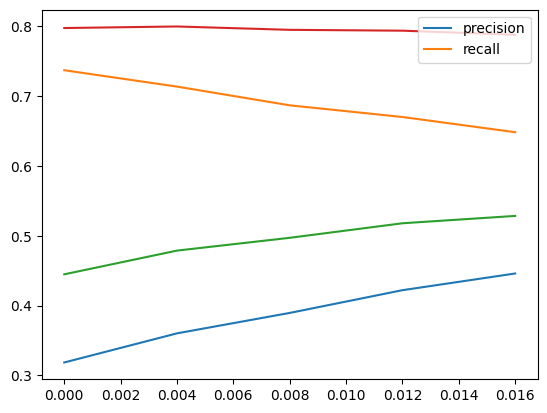

In [133]:
import matplotlib.pyplot as plt
pr=[]
rc=[]
f1=[]
ba1=[]
for i in np.arange(0,0.02,0.004):    
    y_pred=[1 if e > i else 0 for e in error]
    pr.append(precision_recall_fscore_support(y_test,y_pred)[0][1])
    rc.append(precision_recall_fscore_support(y_test,y_pred)[1][1])
    f1.append(precision_recall_fscore_support(y_test,y_pred)[2][1])
    ba1.append(balanced_accuracy_score(y_test,y_pred))
    
plt.plot(np.arange(0,0.02,0.004),pr)
plt.plot(np.arange(0,0.02,0.004),rc)
plt.plot(np.arange(0,0.02,0.004),f1)
plt.plot(np.arange(0,0.02,0.004),ba1)
plt.legend(['precision', 'recall'], loc='upper right');

## Auto Encoder - Short form - deployed in Tableau

In [134]:
df=pd.read_csv('pd_data3.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns=['onboard_flag'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   student_country    36136 non-null  object
 1   totaldays_engaged  36136 non-null  int64 
 2   tendaysafter       36136 non-null  int64 
 3   conversion         36136 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [135]:
from sklearn.compose import make_column_transformer, make_column_selector
ct1=make_column_transformer(
    (OneHotEncoder(sparse=False),make_column_selector(dtype_include=object)),
(StandardScaler(),make_column_selector(dtype_exclude=object)))

df1=df.drop(columns=['conversion'])

ct1.fit(df1)

X_train1,X_test1=train_test_split(df,test_size=0.2,shuffle=True)

X_train1=X_train1[X_train1['conversion']==0]

X_train1.drop(columns='conversion',inplace=True)
y_test=X_test1['conversion']
X_test1.drop(columns='conversion',inplace=True)

X_train1,X_test1=ct1.transform(X_train1),ct1.transform(X_test1)

X_train1.shape

(26464, 183)

In [136]:
input_dim=X_train1.shape[1]
autoencoder1=Sequential([
    
       
#     Dense(135,activation='tanh',activity_regularizer=regularizers.l1(10e-8)),
    
    Dense(135,activation='tanh',activity_regularizer=tf.keras.regularizers.L2(10e-6)),
    
    Dense(90,activation='tanh'),#activity_regularizer=regularizers.l1(10e-8)),
     
    Dense(45,activation='tanh'),#,activity_regularizer=regularizers.l1(10e-8)),
    
    
    Dense(45,activation='relu'),
    
    Dense(90,activation='tanh'),
    Dense(135,activation='tanh'),
    Dense(input_dim,activation='sigmoid')     
     
])

autoencoder1.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(0.0007), metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=8) 
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.1,  
                                                 patience=6,
                                                 verbose=1,  
                                                 min_lr=1e-7)

In [137]:
history=autoencoder1.fit(X_train1,X_train1, epochs=70, batch_size=32,
                         validation_data=(X_test1,X_test1),shuffle=True,verbose=1,
                         callbacks=[early_stopping,reduce_lr])

Epoch 1/70
827/827 [==============================] - 9s 8ms/step - loss: 0.0119 - accuracy: 0.2164 - val_loss: 0.0141 - val_accuracy: 0.3067 - lr: 7.0000e-04
Epoch 2/70
827/827 [==============================] - 7s 8ms/step - loss: 0.0049 - accuracy: 0.4336 - val_loss: 0.0127 - val_accuracy: 0.4795 - lr: 7.0000e-04
Epoch 3/70
827/827 [==============================] - 6s 7ms/step - loss: 0.0040 - accuracy: 0.5617 - val_loss: 0.0122 - val_accuracy: 0.5661 - lr: 7.0000e-04
Epoch 4/70
827/827 [==============================] - 7s 8ms/step - loss: 0.0036 - accuracy: 0.6271 - val_loss: 0.0118 - val_accuracy: 0.6188 - lr: 7.0000e-04
Epoch 5/70
827/827 [==============================] - 6s 7ms/step - loss: 0.0032 - accuracy: 0.7193 - val_loss: 0.0113 - val_accuracy: 0.7269 - lr: 7.0000e-04
Epoch 6/70
827/827 [==============================] - 6s 7ms/step - loss: 0.0028 - accuracy: 0.7905 - val_loss: 0.0110 - val_accuracy: 0.7655 - lr: 7.0000e-04
Epoch 7/70
827/827 [==========================

In [142]:
predictions = autoencoder1.predict(X_test1)
error = np.mean((X_test1 - predictions), axis=1)

th1=np.mean(error)+np.std(error)*2
th2=np.mean(error)-np.std(error)*2

y_pred = [1 if (e > th1 or e < th2) else 0 for e in error]

print("Confusion Matrix: \n",confusion_matrix(y_pred,y_test))
print("F1 Score: \n",f1_score(y_pred,y_test))
print("Balanced Accuracy Score: \n",balanced_accuracy_score(y_pred,y_test))
print("All Scores: \n",precision_recall_fscore_support(y_pred,y_test))

226/226 [==============================] - 1s 4ms/step
Confusion Matrix: 
 [[6605  365]
 [  26  232]]
F1 Score: 
 0.5426900584795321
Balanced Accuracy Score: 
 0.9234287589113921
All Scores: 
 (array([0.99607902, 0.38860972]), array([0.94763271, 0.89922481]), array([0.97125211, 0.54269006]), array([6970,  258], dtype=int64))


In [139]:
def predict_student_autoencoder(a1,a2,a3):
    import pandas as pd
    import numpy as np
#     import tensorflow as tf
    # import pickle5
    
#     da1=pickle.dumps(twr,protocol=5)
    
#     tw=pickle.loads(da1)
    
    
    
    x=pd.DataFrame(np.array([[a1,a2,a3]]),columns=['student_country','totaldays_engaged','tendaysafter'])
    X_test=ct1.transform(x)    
     
#     y_pred1=tf.math.round(twr().predict(tf.convert_to_tensor(X_test,dtype=tf.float64))[0])

#     y_pred1=tf.math.round(autoencoder1.predict(tf.convert_to_tensor(X_test,dtype=tf.float64))[0])



    predictions = autoencoder1.predict(X_test1)
    error = np.mean((X_test1 - predictions), axis=1)

    th1=np.mean(error)+np.std(error)
    th2=np.mean(error)-np.std(error)

    y_pred = [1 if (e > th1 or e < th2) else 0 for e in error][0]


    
#     predictions = tf.convert_to_tensor(autoencoder1.predict(tf.convert_to_tensor(X_test,dtype=tf.float64),verbose=0)
#                                        ,dtype=tf.float64)    
#     mse = np.mean(np.power(X_test - predictions, 2), axis=1)
#     threshold=0.136
#     y_pred = [1.0 if mse > threshold else 0][0]
    
    print("y_pred is ", y_pred)
    
    return y_pred

In [140]:
predict_student_autoencoder('IN',10,20)

226/226 [==============================] - 1s 4ms/step
y_pred is  0


0

In [141]:
client.deploy('predict_student_autoencoder',
predict_student_autoencoder, 'keras Returns prediction of student conversion'
, override = True)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified      